<a href="https://colab.research.google.com/github/TranQuocDuy123/TranQuocDuy123/blob/main/bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapvenha2/money/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 630 images belonging to 11 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapvenha2/money/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 42 images belonging to 11 classes.


In [ ]:
training_data.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_data,epochs=500,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
20/20 [==============================] - 186s 8s/step - loss: 9.4481 - accuracy: 0.0873 - val_loss: 2.3971 - val_accuracy: 0.0714
Epoch 2/500
20/20 [==============================] - 8s 394ms/step - loss: 2.3926 - accuracy: 0.0889 - val_loss: 2.3960 - val_accuracy: 0.0952
Epoch 3/500
20/20 [==============================] - 8s 397ms/step - loss: 2.3762 - accuracy: 0.1143 - val_loss: 2.3888 - val_accuracy: 0.1667
Epoch 4/500
20/20 [==============================] - 8s 392ms/step - loss: 2.3634 - accuracy: 0.1333 - val_loss: 2.3859 - val_accuracy: 0.0952
Epoch 5/500
20/20 [==============================] - 8s 391ms/step - loss: 2.3639 - accuracy: 0.1063 - val_loss: 2.3802 - val_accuracy: 0.1429
Epoch 6/500
20/20 [==============================] - 8s 397ms/step - loss: 2.3500 - accuracy: 0.1397 - val_loss: 2.3517 - val_accuracy: 0.1667
Epoch 7/500
20/20 [==============================] - 8s 395ms/step - loss: 2.3468 - accuracy: 0.1841 - val_loss: 2.3754 - val_accuracy: 0.1667


In [ ]:
Score=model.evaluate(validation_data,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.026696177199482918
Test accuary 0.976190447807312


<function matplotlib.pyplot.show>

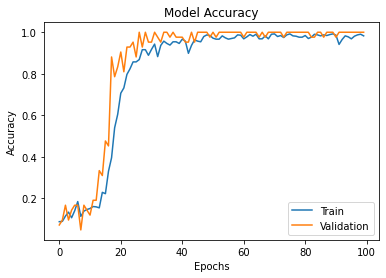

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Final_money.h5")

In [ ]:
model_CNN=load_model('Final_money.h5')

1000


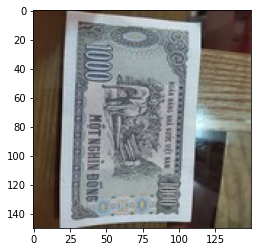

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/1000/019a7c197aa4bbfae2b585.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

10000


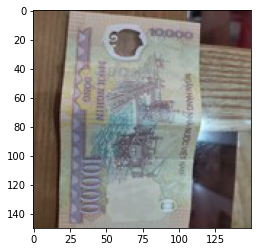

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/10000/021912b90904c85a9115179.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

100000


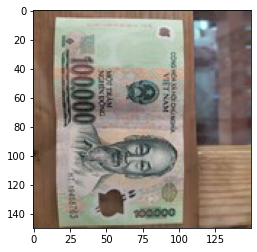

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/100000/43ac5b7545c88496ddd9242.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

200


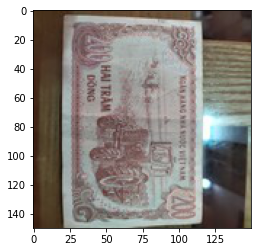

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/200/033fd3a2d31f12414b0e354.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

2000


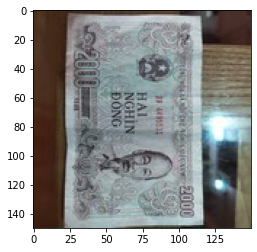

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/2000/08531fa81b15da4b830491.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

20000


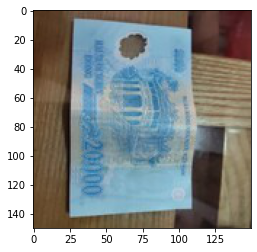

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/20000/16b3e6a7fc1a3d44640b209.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

200000


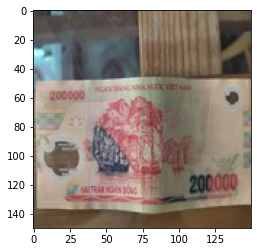

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/200000/031e6ad2776fb631ef7e293.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

500


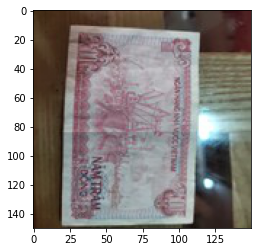

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/500/1c3b4c564beb8ab5d3fa59.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

5000


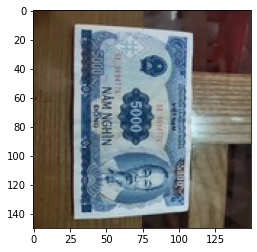

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/5000/1f9b179a1327d2798b36124.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

50000


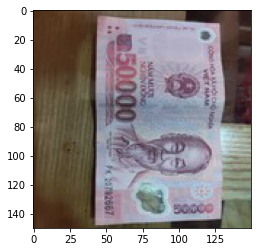

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/50000/0a52d476cccb0d9554da219.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)

500000


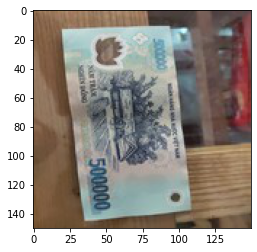

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/money/test/500000/245c69627adfbb81e2ce312.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'
elif round(result[0][10])==1:
  prediction='500000'
print(prediction)